<a href="https://colab.research.google.com/github/issarbhavya/ML/blob/main/01_neural_network_regression_using_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Typical architecture of a regresison neural network



Hyperparamete:	Typical value

Input layer shape	: same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction)

Hidden layer(s)	Problem : specific, minimum = 1, maximum = unlimited

Neurons per hidden layer :	Problem specific, generally 10 to 

Output layer shape : 	Same shape as desired prediction shape (e.g. 1 for house price)

Hidden activation :	Usually ReLU (rectified linear unit)
Output activation	: one, ReLU, logistic/

Loss function : MSE (mean square error) or MAE (mean absolute error)/Huber (combination of MAE/MSE) if 

Optimizer	: SGD (stochastic gradient descent), Adam

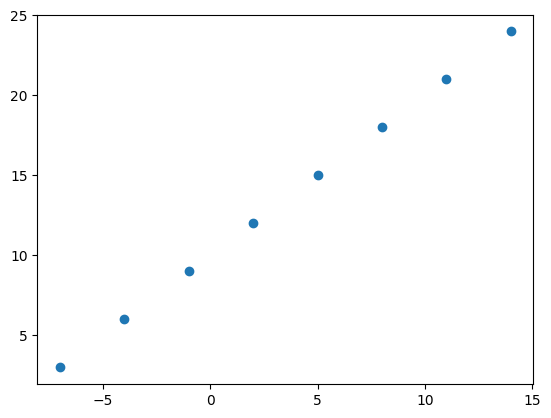

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0]) ## X is Independent variable

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]) ## y is dependent variable


## Independent variable is usually written in caps, whereas dependent is written in lower case

# Visualize it
plt.scatter(X, y)

In [9]:
## how about for finding pattern, we manipulate x to get y 

print(X + 10) 

print(y)

## as you can see both are same

[ 3.  6.  9. 12. 15. 18. 21. 24.]
[ 3.  6.  9. 12. 15. 18. 21. 24.]


so, basically this is the relationship we want our neural network to learn.

this is the realationship between ur Independent and dependent variable

---



## Regression input shapes and output shapes


One of the most important concepts when working with neural networks are the input and output shapes.

The input shape is the shape of your data that goes into the model.

The output shape is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

In [3]:
## Creating a demo for our housing price prediction problem

import tensorflow as tf

# basically here input and output shapes of a regresson model are converted to tensors
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)



---


Our goal here will be to use X to predict y.

So our input will be X and our output will be y.




In [11]:
### lets check the input nd output shape 

# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape

((), ())

It's because no matter what kind of data we pass to our model, it's always going to take as input and return as ouput some kind of tensor.

But in our case because of our dataset (only 2 small lists of numbers), we're looking at a special kind of tensor, more specifically a rank 0 tensor or a scalar.

examples like these don't really make sense but what we basically need to do is, get one x vale nd return one y value

In [12]:
X,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [14]:
X.shape,   y.shape

((8,), (8,))

In [17]:
X[0].shape,   y[0].shape

((), ())

confusion with the output since we have no dimension, that is, it is a scalar value

In [18]:
## converting our numpy array to tensorflow
X=tf.constant(X)
y=tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [19]:
X[0].shape,   y[0].shape

(TensorShape([]), TensorShape([]))

same confusion ,



In our case, we're trying to build a model to predict the pattern between X[0] equalling -7.0 and y[0] equalling 3.0.

So now we get our answer, we're trying to use 1 X value to predict 1 y value.

---




So, now our question is how we will build a model to figure out the realtionship here




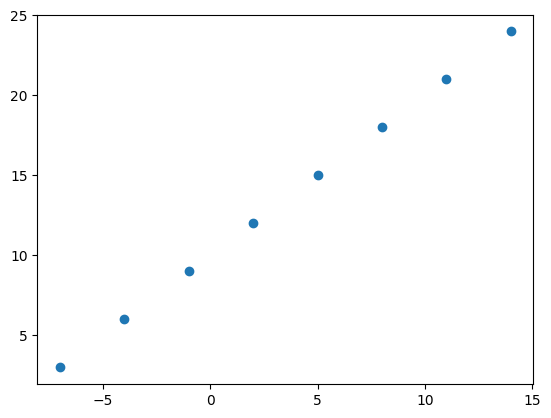

In [21]:
plt.scatter(X, y)

### Steps in modeling a Tensor Flow



---


**1 Creating a model-** 

a. define the **input and output layers**

b. define **hidden layer** for deep learning

---
**2 compiling a model-**

a. define **loss function**(tells us how wrong our model is)

b. define **optimizer** (tells our model to improve patterns it is learning)

c. **Evaluation metrics**(to find out ways to understand model decision making policies better)

---
**3 fitting a model-**

Letting model to try nd find patterns between X nd y(features and labels)

---






In [25]:
tf.random.set_seed(42)




## 1. Creating model using Sequential API
"""
in tensorflow nd keras there are basically two types of apis, Sequential nd functional

"""

model = tf.keras.Sequential([
# this basically tells tensorflow that i want to create a model nd want it to go sequentially through it 
  
   
   tf.keras.layers.Dense(1)   
   # the following is our input layer, we have used "1",
   # as we want our model to take input of one number 
])


## 2. compile the model

model.compile(loss=tf.keras.losses.mae,  # mae : mean absolute error
             # the above line computes mean absolute error between labels and prediction

             # so this basically tells us that on an avg
             # how wrong the predictions(y_pred) are compared to true values(y_true)
             
             optimizer= tf.keras.optimizers.SGD(), # sgd : stochasitc gradient descent
             # it tells neural network how to improve
              
             metrics=["mae"]
             ) 


## 3. fit the model

# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+


model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)
# epochs=5 means 5 laps/oppertunities to go through all of the
# X nd y values nd find out the patters/relatoinships

Epoch 1/5
1/1 [==============================] - 1s 599ms/step - loss: 8.8776 - mae: 8.8776
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 8.7451 - mae: 8.7451
Epoch 3/5
1/1 [==============================] - 0s 15ms/step - loss: 8.6126 - mae: 8.6126
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 8.4801 - mae: 8.4801
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 8.3476 - mae: 8.3476




---


Thus we have trained our model

now let's chaek it with X nd y



In [26]:
model.predict([17.0])

1/1 [==============================] - 0s 102ms/step


array([[25.476719]], dtype=float32)

the answer must be 27, but still it is close to it, as we can see that after training of 5 laps, loss is still 8.34 

In [27]:
model.predict([22.0])

1/1 [==============================] - 0s 199ms/step


array([[32.955166]], dtype=float32)

In [30]:
model.predict([39.0])

1/1 [==============================] - 0s 144ms/step


array([[58.381886]], dtype=float32)

Thus as we can see, that for different different predictions, the answers are still not matching nd sometimes difference in expected result is more nd sometimes its less

## Improving our model